In [3]:
import re 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt             #visualisation
import seaborn as sns    #visualisation


sns.set(color_codes=True)

In [4]:
df = pd.read_csv(r'C:\Users\Lenovo\TestTask\test_sample.csv',lineterminator='\n')

In [5]:
df.fillna(0,inplace=True)

In [6]:
for col in df:
    print(col, df[col].isnull().sum())

platform 0
account_id 0
id 0
created_time 0
text_original 0
text_additional 0
likes_count 0
shares_count 0
comments_count 0
views_count 0


In [5]:
df.head()

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
0,Instagram,59141296785,C_00PPctR-o,2024-09-12 17:20:36.000000 +00:00,0,0,222.0,0.0,34.0,0.0
1,Instagram,60554087008,C_00W8KttVv,2024-09-12 17:21:27.000000 +00:00,C’è un gruppo sulla parola di Dio sulla mia ho...,0,391.0,0.0,37.0,0.0
2,Instagram,62605500679,C_026U_t3We,2024-09-12 17:43:38.000000 +00:00,𝐒𝐮𝐥 𝐦𝐢𝐨 𝐩𝐫𝐨𝐟𝐢𝐥𝐨 𝐜‘𝐞̀ 𝐮𝐧 𝐠𝐫𝐮𝐩𝐩𝐨 𝐝𝐢 𝐬𝐭𝐮𝐝𝐢𝐨 𝐬𝐮𝐥𝐥𝐚...,0,9.0,0.0,3.0,0.0
3,Instagram,58741537308,C_05B3hCYQn,2024-09-12 18:02:08.000000 +00:00,#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsi...,0,78.0,0.0,15.0,0.0
4,Instagram,58741537308,C_0BfOLiqRS,2024-09-12 09:57:22.000000 +00:00,#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsi...,0,129.0,0.0,16.0,0.0


In [22]:
df.tail()

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
9995,YouTube,UCXZUJg9kVm180MmCfQ4O4Fg,2ZrdyqdjST4,2024-10-10 15:16:59.000000 +00:00,"💞💞Будь ласка, не йдіть, не даруючи їм трохи лю...",NaN,2165.0,NaN,89.0,18613.0
9996,YouTube,UCXZUJg9kVm180MmCfQ4O4Fg,rzcLR-bjtrM,2024-09-30 03:30:33.000000 +00:00,"100% прочитають його, але лише 1% відповість: ...",NaN,53.0,NaN,8.0,1007.0
9997,YouTube,UCXZUJg9kVm180MmCfQ4O4Fg,jBIvuk6sr2I,2024-09-29 15:45:01.000000 +00:00,"Я дякую тим, хто привітав.Тільки ті, хто любит...",NaN,1271.0,NaN,28.0,22564.0
9998,YouTube,UCXZUJg9kVm180MmCfQ4O4Fg,qBVRIlPta04,2024-09-29 09:30:27.000000 +00:00,Нехай Бог благословить її і пошле теплі побажа...,NaN,302.0,NaN,7.0,3697.0
9999,YouTube,UCXZUJg9kVm180MmCfQ4O4Fg,Z7DQPr6Scjs,2024-09-29 03:45:01.000000 +00:00,"Я дякую тим, хто привітав.Тільки ті, хто любит...",NaN,1920.0,NaN,70.0,19788.0


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         10000 non-null  object 
 1   account_id       10000 non-null  object 
 2   id               10000 non-null  object 
 3   created_time     10000 non-null  object 
 4   text_original    7613 non-null   object 
 5   text_additional  3 non-null      object 
 6   likes_count      9998 non-null   float64
 7   shares_count     5000 non-null   float64
 8   comments_count   9955 non-null   float64
 9   views_count      5621 non-null   float64
dtypes: float64(4), object(6)
memory usage: 781.4+ KB


In [27]:
df.describe()

,likes_count,shares_count,comments_count,views_count
count,9998.000000,5000.000000,9955.000000,5.621000e+03
mean,1416.641928,79.232000,299.793872,1.797353e+04
std,5981.971791,979.564848,1257.022415,1.012492e+05
min,0.000000,0.000000,0.000000,3.000000e+00
25%,116.250000,3.000000,28.000000,1.539000e+03
50%,356.000000,9.000000,93.000000,3.704000e+03
75%,895.750000,43.000000,261.000000,8.535000e+03
max,188611.000000,47500.000000,80415.000000,3.500000e+06


array([[<Axes: xlabel='likes_count', ylabel='likes_count'>,
        <Axes: xlabel='shares_count', ylabel='likes_count'>,
        <Axes: xlabel='comments_count', ylabel='likes_count'>,
        <Axes: xlabel='views_count', ylabel='likes_count'>],
       [<Axes: xlabel='likes_count', ylabel='shares_count'>,
        <Axes: xlabel='shares_count', ylabel='shares_count'>,
        <Axes: xlabel='comments_count', ylabel='shares_count'>,
        <Axes: xlabel='views_count', ylabel='shares_count'>],
       [<Axes: xlabel='likes_count', ylabel='comments_count'>,
        <Axes: xlabel='shares_count', ylabel='comments_count'>,
        <Axes: xlabel='comments_count', ylabel='comments_count'>,
        <Axes: xlabel='views_count', ylabel='comments_count'>],
       [<Axes: xlabel='likes_count', ylabel='views_count'>,
        <Axes: xlabel='shares_count', ylabel='views_count'>,
        <Axes: xlabel='comments_count', ylabel='views_count'>,
        <Axes: xlabel='views_count', ylabel='views_count'>]], dty

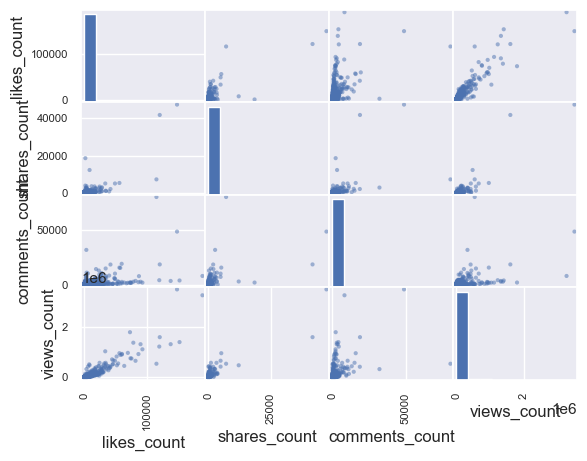

In [92]:
pd.plotting.scatter_matrix(df) 

In [84]:
corr = df[['likes_count','shares_count', 'comments_count', 'views_count']].corr()


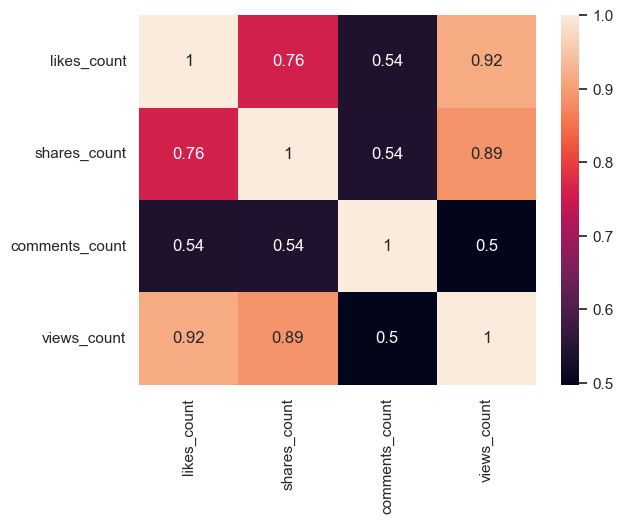

In [76]:
sns.heatmap(corr, annot=True)
plt.show()

text_original
#preghiera              894
#gesù                   642
#modlitwa               627
#господь                533
#Jezus                  504
                       ... 
#поэзия                   1
#Лорд                     1
#молитвапосоглашению      1
#saintemarie              1
#wagner                   1
Name: count, Length: 3055, dtype: int64


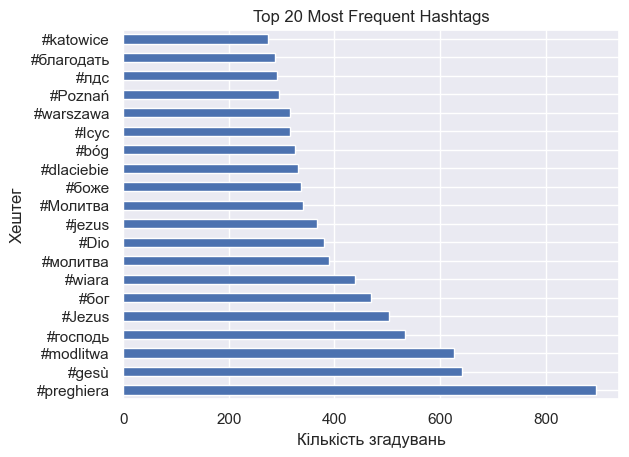

In [74]:

# 1. Витягуємо всі хештеги
def extract_hashtags(text):
    return re.findall(r'#\w+', str(text)) # Convert to string to handle non-string data
hashtags_list = df['text_original'].apply(extract_hashtags).explode()

# 2. Видаляємо NaN значення, що з'являються після explode(), якщо текст не містить хештегів
hashtags_list = hashtags_list.dropna()

# 3. Обчислюємо частоту зустрічання хештегів
hashtags = hashtags_list.value_counts()

# Виводимо результат
print(hashtags)

# (Опціонально) Графік
import matplotlib.pyplot as plt
hashtags[:20].plot.barh(title='Top 20 Most Frequent Hashtags')
plt.xlabel("Кількість згадувань")
plt.ylabel("Хештег")
plt.show()


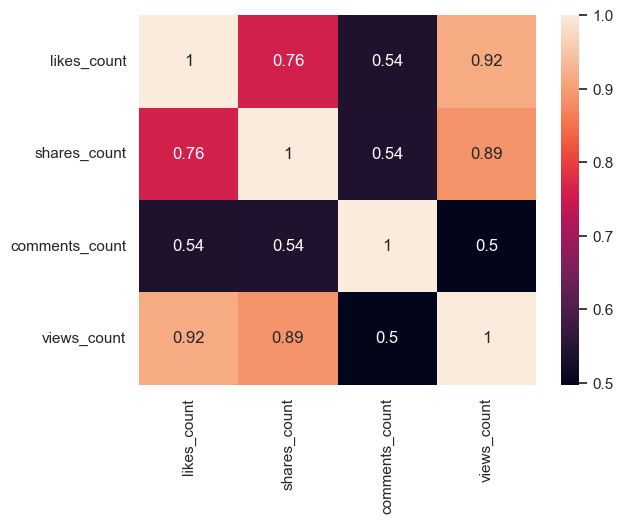

text_original
#preghiera              894
#gesù                   642
#modlitwa               627
#господь                533
#Jezus                  504
                       ... 
#поэзия                   1
#Лорд                     1
#молитвапосоглашению      1
#saintemarie              1
#wagner                   1
Name: count, Length: 3055, dtype: int64


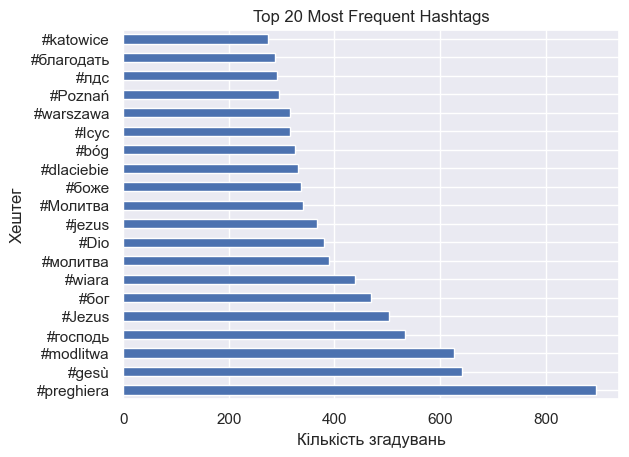

In [89]:
sns.heatmap(corr, annot=True)
plt.show()


# 1. Витягуємо всі хештеги
def extract_hashtags(text):
    return re.findall(r'#\w+', str(text)) # Convert to string to handle non-string data
hashtags_list = df['text_original'].apply(extract_hashtags).explode()

# 2. Видаляємо NaN значення, що з'являються після explode(), якщо текст не містить хештегів
hashtags_list = hashtags_list.dropna()

# 3. Обчислюємо частоту зустрічання хештегів
hashtags = hashtags_list.value_counts()

# Виводимо результат
print(hashtags)

# (Опціонально) Графік
import matplotlib.pyplot as plt
hashtags[:20].plot.barh(title='Top 20 Most Frequent Hashtags')
plt.xlabel("Кількість згадувань")
plt.ylabel("Хештег")
plt.show()